#Coded by Ari Sukma Negara

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print('np.__version__:', np.__version__)
print('pd.__version__:', pd.__version__)
print('matplotlib.__version__:', matplotlib.__version__)
print('sklearn.__version__:', sklearn.__version__)
print('torch.__version__:', torch.__version__)
print('tf.__version__:', tf.__version__)

np.__version__: 1.21.5
pd.__version__: 1.3.5
matplotlib.__version__: 3.5.1
sklearn.__version__: 0.22.2.post1
torch.__version__: 1.11.0+cpu
tf.__version__: 2.2.0


In [2]:
#create data simulation
from sklearn import datasets
x, y, coef = datasets.make_regression(n_samples = 100, n_features = 1,
                                n_informative = 1, n_targets = 1,
                                noise = 3, coef = True, bias = 3)
print(x.shape)
print(y.shape)
print(coef)

(100, 1)
(100,)
53.452820728124074


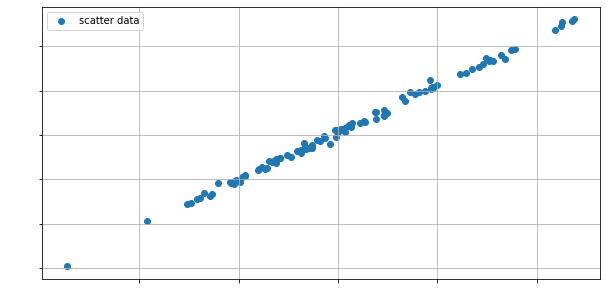

In [3]:
#visualize data
def viz(x,y, a= None, b=None):
    plt.figure(figsize=[10,5])
    plt.scatter(x,y, label='scatter data')
    plt.xticks(color = "white")
    plt.yticks(color = "white")
    if a!=None:
        x_line = np.linspace(min(x),max(x),20)
        y_line = a*x_line+b
        plt.plot(x_line, y_line, '-r', label='y={}x+{}'.format(a,b))
        plt.xlabel('x_line', color='#1C2833')
        plt.ylabel('y_line', color='#1C2833')
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

viz(x,y)

In [4]:
#Split Data for Training & testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42)
#viz(x_train, y_train)
#viz(x_test, y_test)

Wight = [52.9657409], Bias = 3.329572943245133
RMSE: 2.796557819238704
R2_Score 0.9981640928361534


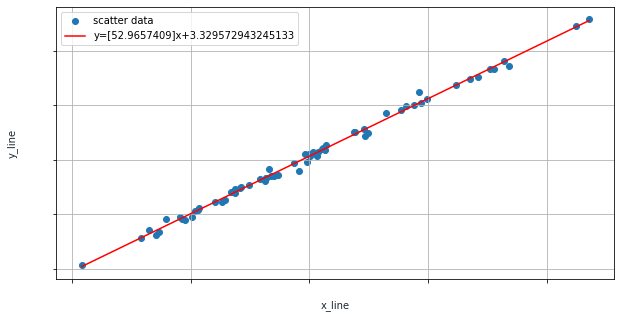

In [5]:
#SKLEARN WAY

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred.shape

print('Wight = {}, Bias = {}'.format( lr.coef_, lr.intercept_))
print('RMSE:', (mean_squared_error(y_test, y_pred))**0.5)
print('R2_Score', r2_score(y_test, y_pred))
viz(x_train,y_train, a=lr.coef_, b =lr.intercept_)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Weight = [52.96471], Bias = 3.3592820167541504
RMSE: 2.7988655967535387
R2_Score 0.9981610615285813


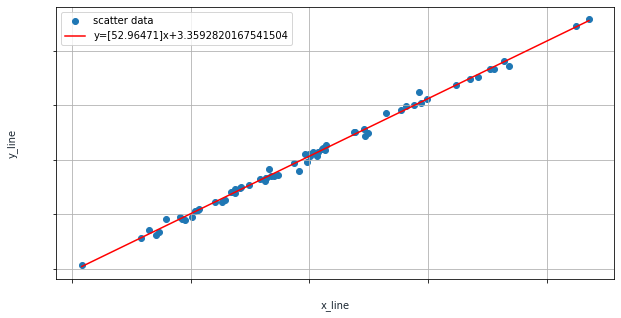

In [11]:
#KERAS Way

model = keras.Sequential()
model.add(layers.Dense(1,  input_shape=[1,],activation='linear'))
model.add(layers.Dense(1))
optimizer = tf.keras.optimizers.SGD(0.003, momentum=0.2)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
model.summary()
history = model.fit(x_train, y_train, epochs=1200, verbose=0)
df_history = pd.DataFrame(history.history)
df_history['epoch'] = history.epoch
df_history.tail()
y_pred = model.predict(x_test)

a = model.layers[0].get_weights()[0][0]
b = model.layers[0].get_weights()[1][0]
print('Weight = {}, Bias = {}'.format(a, b))
print('RMSE:', (mean_squared_error(y_test, y_pred))**0.5)
print('R2_Score', r2_score(y_test, y_pred))
viz(x_train,y_train, a, b)


epoch 0, loss function 2399.700927734375
epoch 1000, loss function 9.548709869384766
epoch 2000, loss function 9.548709869384766
epoch 3000, loss function 9.548709869384766
epoch 4000, loss function 9.548709869384766
epoch 5000, loss function 9.548709869384766
epoch 6000, loss function 9.548709869384766
epoch 7000, loss function 9.548709869384766
epoch 8000, loss function 9.548709869384766
epoch 9000, loss function 9.548709869384766


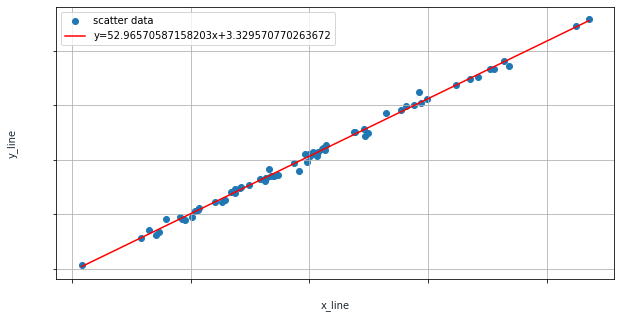

Weight = 52.96570587158203, Bias = 3.329570770263672
RMSE: 2.796570181982554
R2_Score 0.998164076604127


In [9]:
from torch.autograd import Variable
class LRtorch(torch.nn.Module):
    def __init__(self): 
        super(LRtorch, self).__init__() 
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x): 
        predict_y = self.linear(x) 
        return predict_y 

model = LRtorch()
criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)
x_py = Variable(torch.Tensor(x_train))
y_py = Variable(torch.Tensor(y_train)).unsqueeze(-1)
for epoch in range(10000): 
    y_pred = model(x_py)
    loss = criterion(y_pred, y_py)
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    if epoch%1000==0:
        print('epoch {}, loss function {}'.format(epoch, loss.item()))
a= list(model.parameters())[0].data.numpy()[0][0]
b = list(model.parameters())[1].data.numpy()[0]
viz(x_train,y_train, a, b)
y_pred = model.forward(Variable(torch.Tensor(x_test))).detach().numpy()
print('Weight = {}, Bias = {}'.format(a, b))
print('RMSE:', (mean_squared_error(y_test, y_pred))**0.5)
print('R2_Score', r2_score(y_test, y_pred))